In [35]:
import pandas as pd
data=pd.read_csv("/content/MBA.csv")
print(data)

      application_id  gender  international   gpa       major      race  \
0                  1  Female          False  3.30    Business     Asian   
1                  2    Male          False  3.28  Humanities     Black   
2                  3  Female           True  3.30    Business       NaN   
3                  4    Male          False  3.47        STEM     Black   
4                  5    Male          False  3.35        STEM  Hispanic   
...              ...     ...            ...   ...         ...       ...   
6189            6190    Male          False  3.49    Business     White   
6190            6191    Male          False  3.18        STEM     Black   
6191            6192  Female           True  3.22    Business       NaN   
6192            6193    Male           True  3.36    Business       NaN   
6193            6194    Male          False  3.23        STEM  Hispanic   

       gmat  work_exp          work_industry admission  
0     620.0       3.0     Financial Servic

In [36]:
data.isna().sum()

application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission         5194
dtype: int64

In [37]:
data["race"]=data["race"].fillna("0")
data["admission"]=data["admission"].fillna("0")
print(data)

      application_id  gender  international   gpa       major      race  \
0                  1  Female          False  3.30    Business     Asian   
1                  2    Male          False  3.28  Humanities     Black   
2                  3  Female           True  3.30    Business         0   
3                  4    Male          False  3.47        STEM     Black   
4                  5    Male          False  3.35        STEM  Hispanic   
...              ...     ...            ...   ...         ...       ...   
6189            6190    Male          False  3.49    Business     White   
6190            6191    Male          False  3.18        STEM     Black   
6191            6192  Female           True  3.22    Business         0   
6192            6193    Male           True  3.36    Business         0   
6193            6194    Male          False  3.23        STEM  Hispanic   

       gmat  work_exp          work_industry admission  
0     620.0       3.0     Financial Servic

In [38]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
data["gender"]=b.fit_transform(data["gender"])
data["international"]=b.fit_transform(data["international"])
data["major"]=b.fit_transform(data["major"])
data["race"]=b.fit_transform(data["race"])
data["work_industry"]=b.fit_transform(data["work_industry"])
data["admission"]=b.fit_transform(data["admission"])
print(data)

      application_id  gender  international   gpa  major  race   gmat  \
0                  1       0              0  3.30      0     1  620.0   
1                  2       1              0  3.28      1     2  680.0   
2                  3       0              1  3.30      0     0  710.0   
3                  4       1              0  3.47      2     2  690.0   
4                  5       1              0  3.35      2     3  590.0   
...              ...     ...            ...   ...    ...   ...    ...   
6189            6190       1              0  3.49      0     5  640.0   
6190            6191       1              0  3.18      2     2  670.0   
6191            6192       0              1  3.22      0     0  680.0   
6192            6193       1              1  3.36      0     0  590.0   
6193            6194       1              0  3.23      2     3  650.0   

      work_exp  work_industry  admission  
0          3.0              3          1  
1          5.0              6        

In [39]:
x=data.drop("admission",axis=1)
y=data["admission"]

In [40]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.02)
print(xtrain)
print(ytrain)

      application_id  gender  international   gpa  major  race   gmat  \
5583            5584       0              0  3.27      0     3  640.0   
5879            5880       1              1  3.40      1     0  700.0   
3575            3576       1              0  3.26      2     1  640.0   
1751            1752       1              0  2.86      2     1  570.0   
1555            1556       1              0  3.20      2     1  600.0   
...              ...     ...            ...   ...    ...   ...    ...   
724              725       1              0  3.18      2     5  680.0   
32                33       1              0  3.33      1     2  700.0   
236              237       1              0  3.49      1     5  720.0   
4486            4487       1              0  3.47      2     2  710.0   
3381            3382       0              0  3.25      2     5  640.0   

      work_exp  work_industry  
5583       4.0              1  
5879       6.0              4  
3575       4.0             

(array([[871.,   0.,   0.,   0.,   0.,  21.,   0.,   0.,   0.,   2.],
        [672.,   0.,   0.,   0.,   0.,  19.,   0.,   0.,   0.,   3.],
        [821.,   0.,   0.,   0.,   0.,  26.,   0.,   0.,   0.,   9.],
        [861.,   0.,   0.,   0.,   0.,  19.,   0.,   0.,   0.,  15.],
        [693.,   0.,   0.,   0.,   0., 213.,   0.,   0.,   0.,  31.],
        [520.,   0.,   0.,   0.,   0., 194.,   0.,   0.,   0.,  14.],
        [356.,   0.,   0.,   0.,   0., 161.,   0.,   0.,   0.,  14.],
        [201.,   0.,   0.,   0.,   0., 114.,   0.,   0.,   0.,   3.],
        [113.,   0.,   0.,   0.,   0.,  68.,   0.,   0.,   0.,   4.],
        [ 86.,   0.,   0.,   0.,   0.,  65.,   0.,   0.,   0.,   5.]]),
 array([570., 591., 612., 633., 654., 675., 696., 717., 738., 759., 780.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <matplotlib.collections.QuadMesh at 0x7fc973a80ed0>)

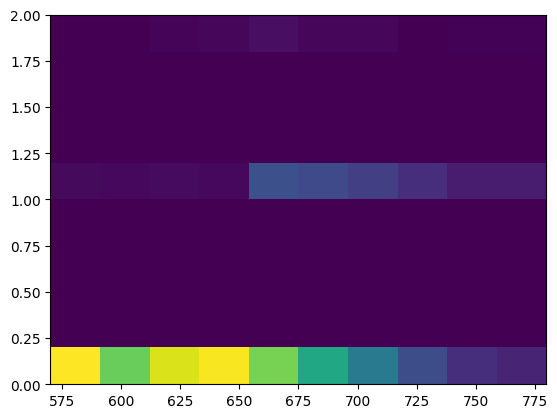

In [47]:
from matplotlib import pyplot as plt
plt.hist2d(data["gmat"],data["admission"])

In [41]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)
ytrain=model.predict(xtrain)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
c=model.predict([[6195,1,1,4.45,1,0,720.0,5.0,10]])
print(c)

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [43]:
from sklearn.metrics import confusion_matrix
ypred=model.predict(xtest)
print(confusion_matrix(ytest,ypred))

[[103   0   0]
 [ 19   0   0]
 [  2   0   0]]


In [44]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.8306451612903226


In [45]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       103
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00         2

    accuracy                           0.83       124
   macro avg       0.28      0.33      0.30       124
weighted avg       0.69      0.83      0.75       124



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
